In [2]:
import numpy as np
import networkx as nx
import netrd
import matplotlib.pyplot as plt
import itertools as it
import pickle

plt.rc('axes', axisbelow=True)
%matplotlib inline


- __[Visit the github](https://github.com/netsiphd/netrd)__
- __[Visit the ReadTheDocs](https://netrd.readthedocs.io/en/latest/)__

In [50]:
#data_path = r'D:\Uni\BA\Development\data/final/netrd/SIS/timeseries_ba10_5k_0.15.pickle'
data_path = r'D:\Uni\BA\Development\data/final/Voter/timeseries_grid20_5k_rawseries.pickle'
edges_path = r'D:\Uni\BA\Development\data\final\edges_grid20.pickle'
with open(data_path, 'rb') as f:
    TS_t = pickle.load(f)
with open(edges_path, 'rb') as f:
    matrix = pickle.load(f)
TS = TS_t.transpose()
print(TS.shape)
G0 = nx.convert_matrix.from_numpy_array(matrix)
print(matrix)
k_avg = np.mean(list(dict(G0.degree()).values()))
print(k_avg)

(20, 5000)
[[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]]
3.1


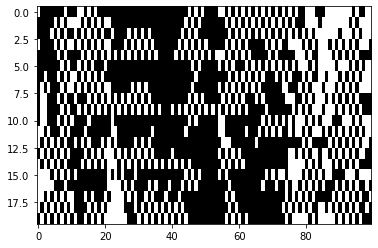

In [51]:
plt.imshow(TS[:,0:100], cmap='Greys', aspect='auto')

### Using the time series above (right), we want to reconstruct the adjacency matrix (middle)

In [52]:
# dictionary of some of the reconstruction techniques in netrd
# (leaving out some of the more computationally expensive ones)
recons = {
    #'ConvergentCrossMapping':       netrd.reconstruction.ConvergentCrossMapping(),
    'CorrelationMatrix':            netrd.reconstruction.CorrelationMatrix(),
    #'ExactMeanField':               netrd.reconstruction.MeanField(),
    #'FreeEnergyMinimization':       netrd.reconstruction.FreeEnergyMinimization(),
    'GraphicalLasso':               netrd.reconstruction.GraphicalLasso(),
    #'MarchenkoPastur':              netrd.reconstruction.MarchenkoPastur(),
    #'MaximumLikelihoodEstimation':  netrd.reconstruction.MaximumLikelihoodEstimation(),
    'MutualInformationMatrix':      netrd.reconstruction.MutualInformationMatrix(),
    #'OUInference':                  netrd.reconstruction.OUInference(),
    #'ThoulessAndersonPalmer':       netrd.reconstruction.ThoulessAndersonPalmer(),
    #'GrangerCausality':             netrd.reconstruction.GrangerCausality(),
    'PartialCorrelationMatrix':     netrd.reconstruction.PartialCorrelationMatrix(),
    #'PartialCorrelationInfluence':  netrd.reconstruction.PartialCorrelationInfluence(),
}

In [57]:
# for ease of visualization, we'll threshold all the reconstructions 
kwargs = {'threshold_type':'degree', 'avg_k':k_avg}

# dictionary to store the outputs
Wdict = {}

# loop over all the reconstruction techniques
for ri, R1 in list(recons.items()):
    R1.fit(TS, **kwargs)
    Wr = R1.results['thresholded_matrix']
    Wdict[ri] = Wr

bla


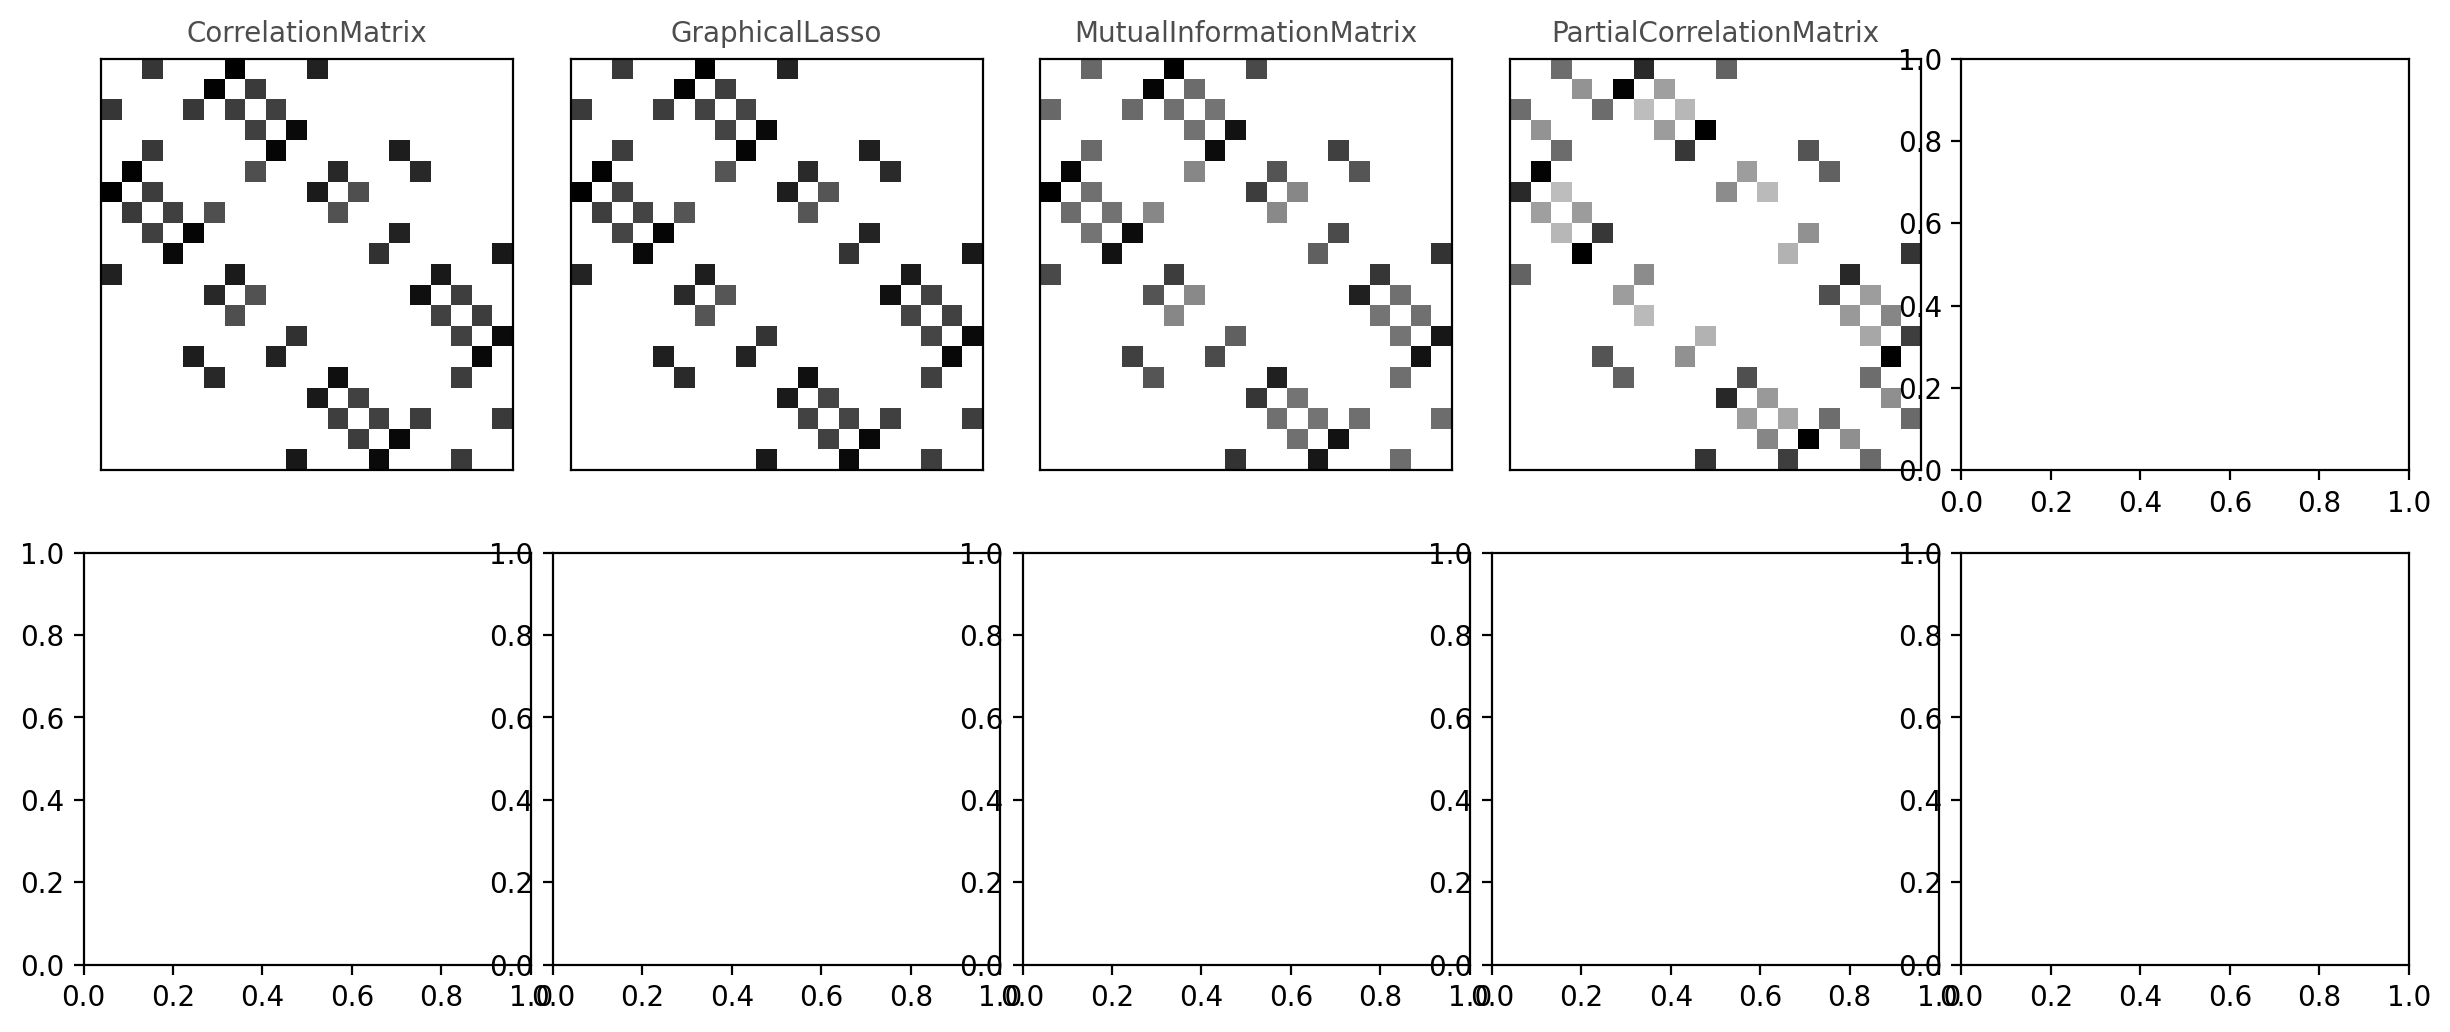

dpne


In [58]:
w = 3.0; h = 3.0
ncols = 5; nrows = 2
tups = list(it.product(range(nrows), range(ncols)))
print('bla')
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), dpi=200)
plt.subplots_adjust(wspace=0.05,hspace=0.2)

ix = 0
for lab_i, W_i in Wdict.items():
    a = ax[tups[ix]]
    a.imshow(W_i, cmap='Greys')
    ix += 1
    a.set_title(lab_i, color='.3', fontsize='medium')
    a.set_yticks([])
    a.set_xticks([])

plt.show()
print('dpne')

### Optimal Threshold

In [ ]:
#def calculate_accuracy(ground_truth, mat, skip_diag=True):
#    num_nodes = ground_truth.size()[0]
#    mask = (1-torch.eye(num_nodes, num_nodes)).to(torch.uint8) \
 #       if skip_diag else torch.ones(num_nodes, num_nodes)
 #   err_ml_nodiag = torch.sum(torch.abs(mat.masked_select(mask) - ground_truth.masked_select(mask)))
 #   accnet_nodiag = 1 - err_ml_nodiag.item() / ground_truth.masked_select(mask).numel()
 #   return accnet_nodiag

In [26]:
def get_best_threshold_accuracy(W, GT_mat):
    GT_mat_cpy = np.copy(GT_mat)
    np.fill_diagonal(GT_mat_cpy, 0)
    N = GT_mat.shape[0]
    W_arr = np.sort(W[np.triu_indices_from(W, 0)])
    #print(W_arr)
    best_acc = -1
    best_matrix = None
    best_threshold = None
    for val in W_arr:
        #print(val)
        thresh = val+1e-10
        W_thresholded = np.copy(W)
        W_thresholded[W<thresh] = 0
        W_thresholded[W>=thresh] = 1
        np.fill_diagonal(W_thresholded, 0)
        #print(W_thresholded)
        acc = 1 - np.sum(np.abs(W_thresholded - GT_mat_cpy)) / (N*N-N)
        #print(acc)
        if acc > best_acc:
            #print('better')
            #print(acc)
            best_acc = acc
            best_matrix = W_thresholded
            best_threshold = thresh
    return best_matrix, best_threshold, best_acc

In [12]:
# calculates fpr and tpr of a matrix compared to the ground truth adjacency matrix
def calculate_tpr_fpr(ground_truth, matrix):
    tp = 0
    p = 0
    n = 0
    fp = 0
    for i in range(ground_truth.shape[0]):
        for j in range(ground_truth.shape[1]):
            if i == j:
                continue
            if(ground_truth[i,j] == 0):
                n += 1
                if(matrix[i,j] == 1):
                    fp += 1
            else:
                p += 1
                if(matrix[i,j] == 1):
                    tp += 1
    return (tp / p, fp / n)

In [9]:
matrix, thresh, acc = get_best_threshold_accuracy(Wdict['CorrelationMatrix'], nx.to_numpy_matrix(G0))
tpr, fpr = calculate_tpr_fpr(nx.to_numpy_matrix(G0), matrix)

plt.imshow(matrix, cmap='Greys')
print('Corr Acc: ' + str(acc))
print('tpr: {0}, fpr: {1}'.format(tpr, fpr))

NameError: name 'get_best_threshold_accuracy' is not defined

Corr Acc: 0.8105263157894737
tpr: 0.0, fpr: 0.0


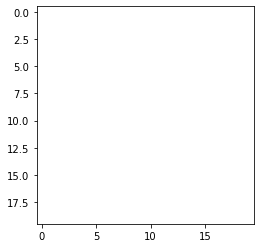

In [28]:
matrix, thresh, acc = get_best_threshold_accuracy(Wdict['PartialCorrelationMatrix'], nx.to_numpy_matrix(G0))
tpr, fpr = calculate_tpr_fpr(nx.to_numpy_matrix(G0), matrix)

plt.imshow(matrix, cmap='Greys')
print('Corr Acc: ' + str(acc))
print('tpr: {0}, fpr: {1}'.format(tpr, fpr))

### Edge-count matching threshold

In [10]:
def get_edge_matching_matrix(W, GT_mat):
    GT_mat_cpy = np.copy(GT_mat)
    np.fill_diagonal(GT_mat_cpy, 0)
    N = GT_mat.shape[0]
    W_arr = np.sort(W[np.triu_indices_from(W, 0)])
    #print(W_arr)
    for val in W_arr:
        thresh = val+1e-10
        W_thresholded = np.copy(W)
        W_thresholded[W<thresh] = 0
        W_thresholded[W>=thresh] = 1
        np.fill_diagonal(W_thresholded, 0)
        acc = 1 - np.sum(np.abs(W_thresholded - GT_mat_cpy)) / (N*N-N)
        if np.sum(W_thresholded) == np.sum(GT_mat_cpy):
            return W_thresholded, acc
    print('ERROR no matching edge count found')
    return None, None

Corr Acc: 0.9263157894736842
tpr: 0.7741935483870968, fpr: 0.0440251572327044


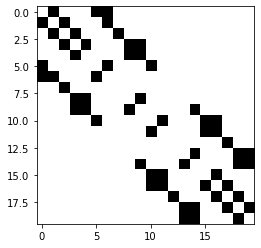

In [13]:
matrix, acc = get_edge_matching_matrix(Wdict['CorrelationMatrix'], nx.to_numpy_matrix(G0))
tpr, fpr = calculate_tpr_fpr(nx.to_numpy_matrix(G0), matrix)

plt.imshow(matrix, cmap='Greys')
print('Corr Acc: ' + str(acc))
print('tpr: {0}, fpr: {1}'.format(tpr, fpr))

Corr Acc: 1.0
tpr: 1.0, fpr: 0.0


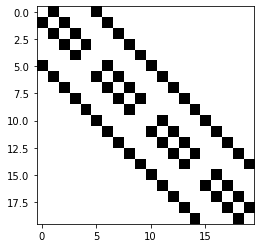

In [14]:
matrix, acc = get_edge_matching_matrix(Wdict['PartialCorrelationMatrix'], nx.to_numpy_matrix(G0))
tpr, fpr = calculate_tpr_fpr(nx.to_numpy_matrix(G0), matrix)

plt.imshow(matrix, cmap='Greys')
print('Corr Acc: ' + str(acc))
print('tpr: {0}, fpr: {1}'.format(tpr, fpr))

### Show GT

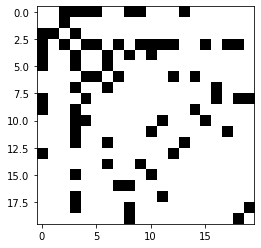

In [83]:
plt.imshow(nx.to_numpy_matrix(G0), cmap='Greys')